<p align="center">
    <img src="HEADER_2.png" alt="Full Width Image" style="width: 100%; height: auto;">
</p>

# **Clinical Trial Analysis**
*Exploring insights from clinical trial data with clean, modular code and compelling visualizations.*

---

### **Objectives**
- Clean and preprocess clinical trial data.
- Analyze and visualize study distributions.
- Highlight funder types and their status outcomes.

---

*Let's dive into the data and uncover patterns!*

## **Data Import and Initial Overview**

### Importing Libraries and Loading the Dataset

---
- **Libraries**: `pandas`, `matplotlib`, `seaborn`
- **Dataset**: `train.csv`

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Import necessary Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [7]:
# Load the dataset
final=pd.read_csv('train.csv')

In [8]:
final.head(2)

,Unnamed: 0,NCT Number,Study Status,Study Results,Sex,Age,Enrollment,Funder Type,Study Type,count,...,adult,child,older_adult,event_type,subjects_affected,subjects_at_risk,event_count,organ_system,frequency_threshold,assessment
0,27,NCT02572570,TERMINATED,YES,ALL,"ADULT, OLDER_ADULT",27.0,OTHER,INTERVENTIONAL,27.0,...,t,f,t,other,1.0,27.0,1.0,"Injury, poisoning and procedural complications",0.0,SYSTEMATIC_ASSESSMENT
1,30,NCT02572570,TERMINATED,YES,ALL,"ADULT, OLDER_ADULT",27.0,OTHER,INTERVENTIONAL,27.0,...,t,f,t,other,2.0,27.0,2.0,"Injury, poisoning and procedural complications",0.0,SYSTEMATIC_ASSESSMENT


In [11]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310857 entries, 0 to 2310856
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   NCT Number           object 
 2   Study Status         object 
 3   Study Results        object 
 4   Sex                  object 
 5   Age                  object 
 6   Enrollment           float64
 7   Funder Type          object 
 8   Study Type           object 
 9   count                float64
 10  gender               object 
 11  healthy_volunteers   object 
 12  adult                object 
 13  child                object 
 14  older_adult          object 
 15  event_type           object 
 16  subjects_affected    float64
 17  subjects_at_risk     float64
 18  event_count          float64
 19  organ_system         object 
 20  frequency_threshold  float64
 21  assessment           object 
dtypes: float64(6), int64(1), object(15)
memory usage: 387.9+ MB


In [13]:
# Drop irrelevant columns to streamline the dataset
final.drop(columns=['Unnamed: 0','NCT Number'],axis=1,inplace=True)

In [14]:
# Identify and handle duplicate rows
final[final.duplicated()].shape

(4628, 20)

In [17]:
# Check for missing values in the dataset
final.isnull().sum()

Study Status           0
Study Results          0
Sex                    0
Age                    0
Enrollment             0
Funder Type            0
Study Type             0
count                  0
gender                 0
healthy_volunteers     0
adult                  0
child                  0
older_adult            0
event_type             0
subjects_affected      0
subjects_at_risk       0
event_count            0
organ_system           0
frequency_threshold    0
assessment             0
dtype: int64

In [18]:
final['Study Status'].value_counts()

Study Status
COMPLETED     1957866
TERMINATED     352950
SUSPENDED          41
Name: count, dtype: int64

In [19]:
# Drop duplicate rows
final.drop_duplicates(subset=None, keep='first', inplace=True)

## **Exploratory Data Analysis (EDA)**

---
Exploratory Data Analysis (EDA) is the process of analyzing and summarizing a dataset to uncover patterns, detect anomalies, test hypotheses, and understand the relationships between variables. It is typically the first step in any data analysis or machine learning project.

### **Why is EDA Important?**
---
**1. Guides Model Selection and Feature Engineering:** EDA provides critical insights that influence the choice of models, features, and preprocessing steps.

**2. Ensures Data Quality and Suitability:** It helps ensure the data is clean and suitable for further analysis or machine learning.

**3. Improves Communication with Stakeholders:** EDA enables better communication of findings to stakeholders through visualizations and summaries.

In [25]:
final['Funder Type'].value_counts()

Funder Type
INDUSTRY     1990402
OTHER         200350
NIH            93234
FED            11716
NETWORK         9190
OTHER_GOV        860
INDIV            477
Name: count, dtype: int64

In [27]:
final['Study Status'].value_counts()

Study Status
COMPLETED     1955335
TERMINATED     350853
SUSPENDED          41
Name: count, dtype: int64

In [29]:
final['Study Status'].value_counts(normalize=True)

Study Status
COMPLETED     0.847849
TERMINATED    0.152133
SUSPENDED     0.000018
Name: proportion, dtype: float64

In [31]:
final['Study Results'].value_counts()

Study Results
YES    2306229
Name: count, dtype: int64

Text(0.5, 1.0, 'Study Type Distribution by Study Status')

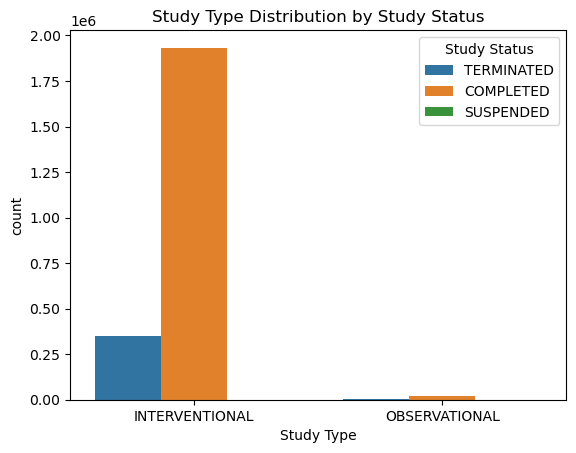

In [33]:
sns.countplot(x='Study Type', hue='Study Status', data=final)
plt.title('Study Type Distribution by Study Status')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'OTHER'),
  Text(1, 0, 'INDUSTRY'),
  Text(2, 0, 'NIH'),
  Text(3, 0, 'FED'),
  Text(4, 0, 'NETWORK'),
  Text(5, 0, 'OTHER_GOV'),
  Text(6, 0, 'INDIV')])

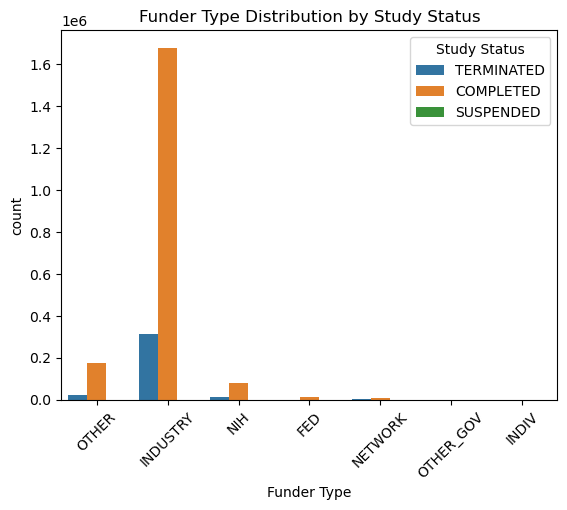

In [34]:
sns.countplot(x='Funder Type', hue='Study Status', data=final)
plt.title('Funder Type Distribution by Study Status')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Study Results Distribution by Study Status')

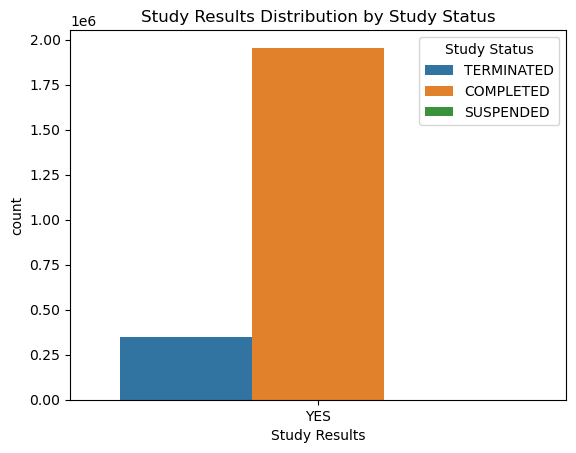

In [35]:
sns.countplot(x='Study Results', hue='Study Status', data=final)
plt.title('Study Results Distribution by Study Status')

In [36]:
final.head(1)

,Study Status,Study Results,Sex,Age,Enrollment,Funder Type,Study Type,count,gender,healthy_volunteers,adult,child,older_adult,event_type,subjects_affected,subjects_at_risk,event_count,organ_system,frequency_threshold,assessment
0,TERMINATED,YES,ALL,"ADULT, OLDER_ADULT",27.0,OTHER,INTERVENTIONAL,27.0,ALL,t,t,f,t,other,1.0,27.0,1.0,"Injury, poisoning and procedural complications",0.0,SYSTEMATIC_ASSESSMENT


## **Data preprocessing**
---
Data preprocessing is an essential step in any data science, machine learning, or analytics project.
Raw data, as collected from various sources, is often incomplete, inconsistent, and may contain errors.
Preprocessing transforms this raw data into a clean, consistent, and analyzable format.
This step ensures the quality and integrity of data, directly influencing the accuracy and reliability of the results.

---
<div align="center">
    <img src="HEADER_3.jpeg" alt="Image Description" width="500">
</div>

---

In [38]:
final.head(1)

,Study Status,Study Results,Sex,Age,Enrollment,Funder Type,Study Type,count,gender,healthy_volunteers,adult,child,older_adult,event_type,subjects_affected,subjects_at_risk,event_count,organ_system,frequency_threshold,assessment
0,TERMINATED,YES,ALL,"ADULT, OLDER_ADULT",27.0,OTHER,INTERVENTIONAL,27.0,ALL,t,t,f,t,other,1.0,27.0,1.0,"Injury, poisoning and procedural complications",0.0,SYSTEMATIC_ASSESSMENT


### **Feature Engineering: One-Hot Encoding**

---

***Objective:***
*To convert categorical variables into numerical format for machine learning models by applying `one-hot encoding` to `Study Type` and `Funder Type` columns.*

***Effect:***
- Each unique category in the columns is transformed into a binary feature (0 or 1).
- Enables models to interpret categorical data effectively without introducing bias.

In [40]:
final.head(1)

,Study Status,Study Results,Sex,Age,Enrollment,Funder Type,Study Type,count,gender,healthy_volunteers,adult,child,older_adult,event_type,subjects_affected,subjects_at_risk,event_count,organ_system,frequency_threshold,assessment
0,TERMINATED,YES,ALL,"ADULT, OLDER_ADULT",27.0,OTHER,INTERVENTIONAL,27.0,ALL,t,t,f,t,other,1.0,27.0,1.0,"Injury, poisoning and procedural complications",0.0,SYSTEMATIC_ASSESSMENT


In [41]:
final = pd.get_dummies(final,columns=['Study Results','Sex','Age','Funder Type','Study Type','gender','healthy_volunteers',
                                      'adult','child','older_adult','event_type','organ_system','assessment'])

In [42]:
final.head(1)

,Study Status,Enrollment,count,subjects_affected,subjects_at_risk,event_count,frequency_threshold,Study Results_YES,Sex_ALL,Sex_FEMALE,...,organ_system_Psychiatric disorders,organ_system_Renal and urinary disorders,organ_system_Reproductive system and breast disorders,"organ_system_Respiratory, thoracic and mediastinal disorders",organ_system_Skin and subcutaneous tissue disorders,organ_system_Social circumstances,organ_system_Surgical and medical procedures,organ_system_Vascular disorders,assessment_NON_SYSTEMATIC_ASSESSMENT,assessment_SYSTEMATIC_ASSESSMENT
0,TERMINATED,27.0,27.0,1.0,27.0,1.0,0.0,True,True,False,...,False,False,False,False,False,False,False,False,False,True


In [43]:
# Identify and handle duplicate rows
final[final.duplicated].shape

(0, 68)

### **Feature Scaling and Normalization**

---

**Objective:** To scale numerical data to a uniform range and reduce bias caused by differing feature scales.

**Effect:**

- **Enhances Model Performance:** Normalization ensures that numerical features contribute equally during model training, preventing features with larger ranges from dominating others.
- **Improves Gradient Descent:** For algorithms relying on gradient descent, normalization speeds up convergence by scaling features consistently.
- **Prepares Data for Distance-Based Algorithms:** Essential for distance-based algorithms like k-Nearest Neighbors and Support Vector Machines.

In [46]:
final

,Study Status,Enrollment,count,subjects_affected,subjects_at_risk,event_count,frequency_threshold,Study Results_YES,Sex_ALL,Sex_FEMALE,...,organ_system_Psychiatric disorders,organ_system_Renal and urinary disorders,organ_system_Reproductive system and breast disorders,"organ_system_Respiratory, thoracic and mediastinal disorders",organ_system_Skin and subcutaneous tissue disorders,organ_system_Social circumstances,organ_system_Surgical and medical procedures,organ_system_Vascular disorders,assessment_NON_SYSTEMATIC_ASSESSMENT,assessment_SYSTEMATIC_ASSESSMENT
0,TERMINATED,27.0,27.0,1.0,27.0,1.0,0.0,True,True,False,...,False,False,False,False,False,False,False,False,False,True
1,TERMINATED,27.0,27.0,2.0,27.0,2.0,0.0,True,True,False,...,False,False,False,False,False,False,False,False,False,True
2,TERMINATED,27.0,27.0,1.0,27.0,1.0,0.0,True,True,False,...,False,False,False,False,False,False,False,False,False,True
3,TERMINATED,27.0,27.0,1.0,27.0,1.0,0.0,True,True,False,...,False,False,False,False,False,False,False,False,False,True
4,TERMINATED,27.0,27.0,1.0,27.0,1.0,0.0,True,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310852,TERMINATED,1474.0,5.0,0.0,460.0,0.0,2.0,True,True,False,...,True,False,False,False,False,False,False,False,True,False
2310853,TERMINATED,1474.0,5.0,0.0,234.0,0.0,2.0,True,True,False,...,True,False,False,False,False,False,False,False,True,False
2310854,TERMINATED,1474.0,5.0,1.0,484.0,1.0,2.0,True,True,False,...,False,False,False,True,False,False,False,False,True,False
2310855,TERMINATED,1474.0,5.0,0.0,460.0,0.0,2.0,True,True,False,...,False,False,False,True,False,False,False,False,True,False


In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [48]:
numerical_cols = final.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Enrollment', 'count', 'subjects_affected', 'subjects_at_risk',
       'event_count', 'frequency_threshold'],
      dtype='object')

In [49]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [50]:
final[numerical_cols] = scaler.fit_transform(final[numerical_cols])

In [51]:
# Convert boolean columns to numeric (1 for True, 0 for False)
boolean_columns = final.select_dtypes(include=['bool']).columns  # Identify boolean columns

for col in boolean_columns:
    final[col] = final[col].astype(int)

In [52]:
final.head(1)

,Study Status,Enrollment,count,subjects_affected,subjects_at_risk,event_count,frequency_threshold,Study Results_YES,Sex_ALL,Sex_FEMALE,...,organ_system_Psychiatric disorders,organ_system_Renal and urinary disorders,organ_system_Reproductive system and breast disorders,"organ_system_Respiratory, thoracic and mediastinal disorders",organ_system_Skin and subcutaneous tissue disorders,organ_system_Social circumstances,organ_system_Surgical and medical procedures,organ_system_Vascular disorders,assessment_NON_SYSTEMATIC_ASSESSMENT,assessment_SYSTEMATIC_ASSESSMENT
0,TERMINATED,-0.999654,-0.999417,-0.999667,-0.998478,-0.999847,-1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
X = final.drop(columns=['Study Status'])
y = final['Study Status']

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2306229 entries, 0 to 2310856
Data columns (total 67 columns):
 #   Column                                                                            Dtype  
---  ------                                                                            -----  
 0   Enrollment                                                                        float64
 1   count                                                                             float64
 2   subjects_affected                                                                 float64
 3   subjects_at_risk                                                                  float64
 4   event_count                                                                       float64
 5   frequency_threshold                                                               float64
 6   Study Results_YES                                                                 int64  
 7   Sex_ALL                         

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Models

---

## Logistic Regression

---

**Logistic Regression** was used as a baseline due to its ***simplicity*** and ***interpretability***. It provides initial insights into feature contributions and class separations, making it ideal for understanding the data structure. Its low computational cost ensures quick results for benchmarking advanced models. Its key advantages include:

- **Interpretability**: Logistic regression coefficients directly indicate the contribution of each feature, making it easy to understand feature impacts.
- **Benchmarking**: As a baseline model, it quickly provides insights into how well the data can be separated without requiring significant computational resources.
- **Simplicity**: Its straightforward implementation and low complexity make it ideal for initial testing and comparison with more advanced models.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_pred_train = model.predict(X_train)

In [63]:
unique, counts = np.unique(y_pred_train, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)
unique, counts = np.unique(y_train, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{'COMPLETED': 1352845, 'TERMINATED': 30892}
{'COMPLETED': 1173756, 'SUSPENDED': 18, 'TERMINATED': 209963}


In [64]:
y_pred_test = model.predict(X_test)

In [65]:
unique, counts = np.unique(y_pred_test, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)
unique, counts = np.unique(y_test, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{'COMPLETED': 901623, 'TERMINATED': 20869}
{'COMPLETED': 781579, 'SUSPENDED': 23, 'TERMINATED': 140890}


In [66]:
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

   COMPLETED       0.86      0.99      0.92    781579
   SUSPENDED       0.00      0.00      0.00        23
  TERMINATED       0.76      0.11      0.20    140890

    accuracy                           0.86    922492
   macro avg       0.54      0.37      0.37    922492
weighted avg       0.85      0.86      0.81    922492

Confusion Matrix:
 [[776503      0   5076]
 [    23      0      0]
 [125097      0  15793]]


## Random Forest

---

**Random Forest** was chosen as a baseline due to its ***robustness*** and ***versatility***. It provides a strong foundation for classification tasks by combining the outputs of multiple decision trees, making it reliable for handling varied datasets. Its ability to handle both categorical and numerical data ensures wide applicability.

- **Feature Importance:** Random Forest ranks feature importance, offering insights into which variables are most influential in predicting the target.
- **Resilience to Overfitting:** By aggregating predictions from multiple trees, it reduces the risk of overfitting, ensuring generalizable performance.
- **Handling Complexity:** It performs well even with large datasets and high-dimensional features, making it suitable for initial comparisons with advanced models.
- **Imbalanced Data:** Random Forest can handle imbalanced classes effectively by weighting class contributions during training.

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
initial_rf = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1)
initial_rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [74]:
y_pred_train = initial_rf.predict(X_train)

In [75]:
unique, counts = np.unique(y_pred_train, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)
unique, counts = np.unique(y_train, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{'COMPLETED': 1173849, 'SUSPENDED': 18, 'TERMINATED': 209870}
{'COMPLETED': 1173756, 'SUSPENDED': 18, 'TERMINATED': 209963}


In [76]:
y_pred_test = initial_rf.predict(X_test)

In [77]:
unique, counts = np.unique(y_pred_test, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)
unique, counts = np.unique(y_test, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{'COMPLETED': 783702, 'SUSPENDED': 5, 'TERMINATED': 138785}
{'COMPLETED': 781579, 'SUSPENDED': 23, 'TERMINATED': 140890}


In [78]:
Acc1 = accuracy_score(y_test, y_pred_test)
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\n")
print("Test Accuracy:\n", accuracy_score(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

   COMPLETED       0.99      1.00      1.00    781579
   SUSPENDED       1.00      0.22      0.36        23
  TERMINATED       0.99      0.97      0.98    140890

    accuracy                           0.99    922492
   macro avg       0.99      0.73      0.78    922492
weighted avg       0.99      0.99      0.99    922492



Confusion Matrix:
 [[779565      0   2014]
 [    18      5      0]
 [  4119      0 136771]]


Test Accuracy:
 0.9933321914986797


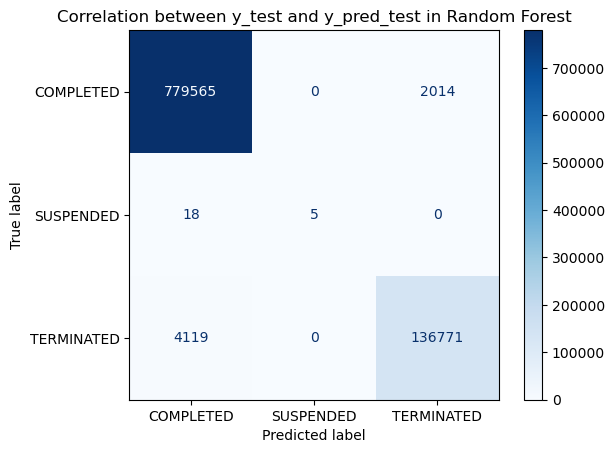

In [79]:
class_names = ["COMPLETED", "SUSPENDED", "TERMINATED"]

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test),display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Correlation between y_test and y_pred_test in Random Forest")
plt.show()

## XgBoost

---

**XGBoost (Extreme Gradient Boosting)** was selected due to its ***efficiency*** and ***accuracy*** in handling structured/tabular data. It provides:

- **Optimized gradient boosting** with regularization to prevent overfitting.
- **Parallel processing capabilities**, making it faster for large datasets.
- **Tree pruning and handling missing values**, which improve predictive performance.

In [81]:
final.head(1)

,Study Status,Enrollment,count,subjects_affected,subjects_at_risk,event_count,frequency_threshold,Study Results_YES,Sex_ALL,Sex_FEMALE,...,organ_system_Psychiatric disorders,organ_system_Renal and urinary disorders,organ_system_Reproductive system and breast disorders,"organ_system_Respiratory, thoracic and mediastinal disorders",organ_system_Skin and subcutaneous tissue disorders,organ_system_Social circumstances,organ_system_Surgical and medical procedures,organ_system_Vascular disorders,assessment_NON_SYSTEMATIC_ASSESSMENT,assessment_SYSTEMATIC_ASSESSMENT
0,TERMINATED,-0.999654,-0.999417,-0.999667,-0.998478,-0.999847,-1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
final['Study Status'].value_counts()

Study Status
COMPLETED     1955335
TERMINATED     350853
SUSPENDED          41
Name: count, dtype: int64

In [85]:
# Map the 'Study Status' column to numeric values
status_mapping = {
    'COMPLETED': 0,
    'SUSPENDED': 1,
    'TERMINATED' : 2,
    'WITHDRAWN' : 3
}

# Apply the mapping
final['Study Status'] = final['Study Status'].map(status_mapping)

# Verify the changes
print(final['Study Status'].head())

0    2
1    2
2    2
3    2
4    2
Name: Study Status, dtype: int64


In [86]:
X = final.drop(columns=['Study Status'])
y = final['Study Status']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [88]:
from xgboost import XGBClassifier

In [89]:
xgb_model = XGBClassifier(objective='multi:softprob')

In [90]:
print(type(X_train))  # Should be <class 'pandas.core.frame.DataFrame'>
print(type(y_train))  # Should be <class 'pandas.core.series.Series'>

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [91]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [92]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [93]:
y_pred_train = xgb_model.predict(X_train)

In [94]:
unique, counts = np.unique(y_pred_train, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)
unique, counts = np.unique(y_train, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 1183834, 1: 18, 2: 199885}
{0: 1173756, 1: 18, 2: 209963}


In [96]:
y_pred_test = xgb_model.predict(X_test)

In [97]:
unique, counts = np.unique(y_pred_test, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)
unique, counts = np.unique(y_test, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 788430, 1: 23, 2: 134039}
{0: 781579, 1: 23, 2: 140890}


In [103]:
Acc2 = accuracy_score(y_test, y_pred_test)
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\n")
print("Test Accuracy:\n", accuracy_score(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    781579
           1       1.00      1.00      1.00        23
           2       0.97      0.92      0.95    140890

    accuracy                           0.98    922492
   macro avg       0.99      0.97      0.98    922492
weighted avg       0.98      0.98      0.98    922492



Confusion Matrix:
 [[777600      0   3979]
 [     0     23      0]
 [ 10830      0 130060]]


Test Accuracy:
 0.9839467442536087


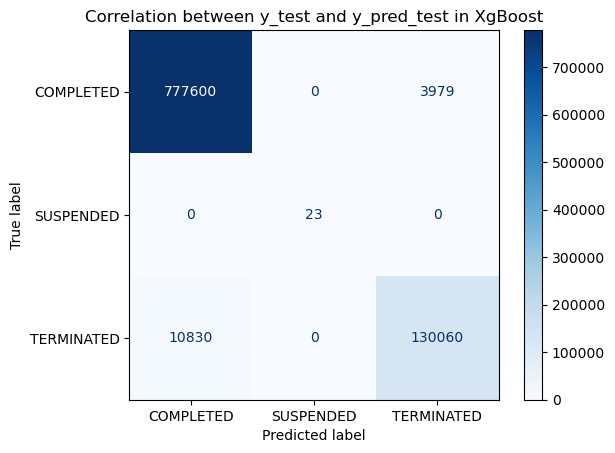

In [104]:
class_names = ["COMPLETED", "SUSPENDED", "TERMINATED"]

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test),display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Correlation between y_test and y_pred_test in XgBoost")
plt.show()

In [105]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R² Score
r2 = r2_score(y_test, y_pred_test)
print(f"R² Score: {r2}")

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_test)
print(f"Explained Variance Score: {explained_variance}")

Mean Absolute Error (MAE): 0.03210651149278259
Mean Squared Error (MSE): 0.06421302298556518
Root Mean Squared Error (RMSE): 0.2534028866954068
R² Score: 0.8759449718417666
Explained Variance Score: 0.8763711919794033


## LightGBM

---

**LightGBM** was chosen for its ***high computational efficiency*** and ability to handle large-scale data. It excels because:

- It uses **leaf-wise tree growth**, which minimizes loss more effectively than level-wise methods.
- It is designed for **fast training and low memory usage**, making it ideal for big datasets.
- It performs well with **categorical features and sparse data**, ensuring robustness.

In [109]:
import lightgbm as lgb

In [110]:
lgb_model = lgb.LGBMClassifier(random_state=42)

In [113]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1367
[LightGBM] [Info] Number of data points in the train set: 1383737, number of used features: 66
[LightGBM] [Info] Start training from score -0.164579
[LightGBM] [Info] Start training from score -11.249927
[LightGBM] [Info] Start training from score -1.885612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

LGBMClassifier(random_state=42)

In [114]:
y_pred_train = lgb_model.predict(X_train)

In [115]:
unique, counts = np.unique(y_pred_train, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)
unique, counts = np.unique(y_train, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 1171084, 2: 212653}
{0: 1173756, 1: 18, 2: 209963}


In [116]:
y_pred_test = lgb_model.predict(X_test)

In [117]:
unique, counts = np.unique(y_pred_test, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)
unique, counts = np.unique(y_test, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 779884, 2: 142608}
{0: 781579, 1: 23, 2: 140890}


In [118]:
Acc3 = accuracy_score(y_test, y_pred_test)
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\n")
print("Test Accuracy:\n", accuracy_score(y_test, y_pred_test))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    781579
           1       0.00      0.00      0.00        23
           2       0.78      0.79      0.78    140890

    accuracy                           0.93    922492
   macro avg       0.58      0.58      0.58    922492
weighted avg       0.93      0.93      0.93    922492



Confusion Matrix:
 [[750168      0  31411]
 [    23      0      0]
 [ 29693      0 111197]]


Test Accuracy:
 0.933737094739033


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


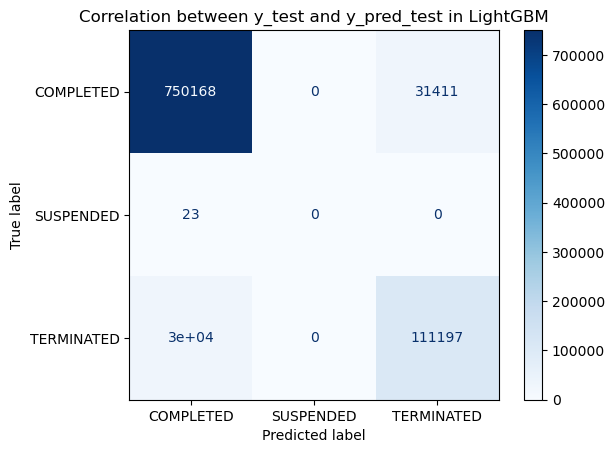

In [119]:
class_names = ["COMPLETED", "SUSPENDED", "TERMINATED"]

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test),display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Correlation between y_test and y_pred_test in LightGBM")
plt.show()

In [120]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R² Score
r2 = r2_score(y_test, y_pred_test)
print(f"R² Score: {r2}")

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_test)
print(f"Explained Variance Score: {explained_variance}")

Mean Absolute Error (MAE): 0.13250087805639507
Mean Squared Error (MSE): 0.2649768236472511
Root Mean Squared Error (RMSE): 0.5147589956933741
R² Score: 0.48808347916857275
Explained Variance Score: 0.48810992386678365


## CatBoost

---

**CatBoost** was employed due to its ***native support for categorical data*** and ***robustness*** against overfitting. Key advantages include:

- **Efficient handling of categorical variables** without the need for extensive preprocessing like one-hot encoding.
- **High interpretability**, which helps in understanding feature contributions.
- Strong performance in scenarios with **imbalanced data**, making it suitable for complex real-world problems.

In [123]:
import catboost
from catboost import CatBoostClassifier

In [126]:
model = CatBoostClassifier(
    iterations=2000,       # Number of boosting iterations
    learning_rate=0.1,     # Learning rate
    depth=6,               # Tree depth
    verbose=100            # Print progress every 100 iterations
)

In [127]:
model.fit(X_train, y_train)

0:	learn: 0.9665678	total: 215ms	remaining: 7m 9s
100:	learn: 0.2119887	total: 23.1s	remaining: 7m 13s
200:	learn: 0.1609090	total: 46.4s	remaining: 6m 55s
300:	learn: 0.1316621	total: 1m 5s	remaining: 6m 12s
400:	learn: 0.1119384	total: 1m 25s	remaining: 5m 40s
500:	learn: 0.0981351	total: 1m 44s	remaining: 5m 13s
600:	learn: 0.0869699	total: 2m 3s	remaining: 4m 48s
700:	learn: 0.0782940	total: 2m 23s	remaining: 4m 25s
800:	learn: 0.0707070	total: 2m 42s	remaining: 4m 2s
900:	learn: 0.0643000	total: 3m 1s	remaining: 3m 41s
1000:	learn: 0.0595967	total: 3m 20s	remaining: 3m 20s
1100:	learn: 0.0550991	total: 3m 39s	remaining: 2m 59s
1200:	learn: 0.0516963	total: 3m 59s	remaining: 2m 39s
1300:	learn: 0.0484712	total: 4m 18s	remaining: 2m 18s
1400:	learn: 0.0456164	total: 4m 37s	remaining: 1m 58s
1500:	learn: 0.0434169	total: 4m 55s	remaining: 1m 38s
1600:	learn: 0.0411498	total: 5m 21s	remaining: 1m 20s
1700:	learn: 0.0393041	total: 5m 41s	remaining: 59.9s
1800:	learn: 0.0376736	total: 5

In [128]:
y_pred_train = model.predict(X_train)

In [129]:
unique, counts = np.unique(y_pred_train, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)
unique, counts = np.unique(y_train, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 1177048, 1: 18, 2: 206671}
{0: 1173756, 1: 18, 2: 209963}


In [130]:
y_pred_test = model.predict(X_test)

In [131]:
unique, counts = np.unique(y_pred_test, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)
unique, counts = np.unique(y_test, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 783840, 1: 23, 2: 138629}
{0: 781579, 1: 23, 2: 140890}


In [132]:
Acc4 = accuracy_score(y_test, y_pred_test)
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\n")
print("Test Accuracy:\n", accuracy_score(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    781579
           1       1.00      1.00      1.00        23
           2       0.98      0.97      0.97    140890

    accuracy                           0.99    922492
   macro avg       0.99      0.99      0.99    922492
weighted avg       0.99      0.99      0.99    922492



Confusion Matrix:
 [[779175      0   2404]
 [     0     23      0]
 [  4665      0 136225]]


Test Accuracy:
 0.9923370609176014


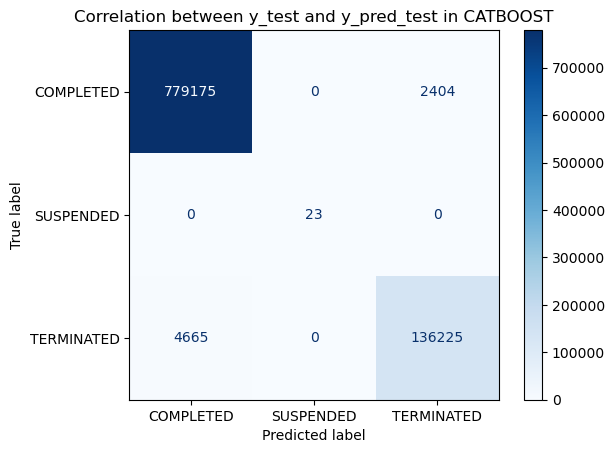

In [133]:
class_names = ["COMPLETED", "SUSPENDED", "TERMINATED"]

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test),display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Correlation between y_test and y_pred_test in CATBOOST")
plt.show()

In [134]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R² Score
r2 = r2_score(y_test, y_pred_test)
print(f"R² Score: {r2}")

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_test)
print(f"Explained Variance Score: {explained_variance}")

Mean Absolute Error (MAE): 0.015325878164797094
Mean Squared Error (MSE): 0.030651756329594188
Root Mean Squared Error (RMSE): 0.17507642996587
R² Score: 0.9407829702173981
Explained Variance Score: 0.9408293925709293


# Model Accuracy Comparison Across Different Models

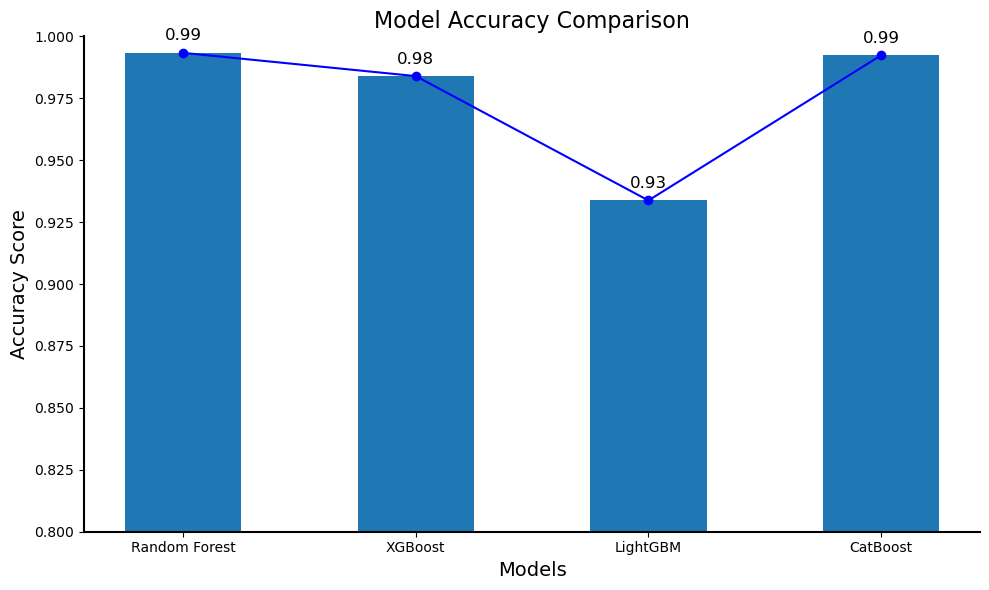

In [136]:
# Accuracy scores for the models
models = ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']
accuracy_scores = [Acc1, Acc2, Acc3, Acc4]

# Plotting
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axes
plt.bar(models, accuracy_scores, width=0.5)
plt.plot(models, accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy Score')

# Adding labels and title
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0.8, 1.0)  # Adjust based on your scores
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a box around the plot area
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set the color of the box
    spine.set_linewidth(1.5)  # Set the width of the box

# Adding text on bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.005, f"{score:.2f}", ha='center', fontsize=12)

# Remove the upper spine if desired (optional)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


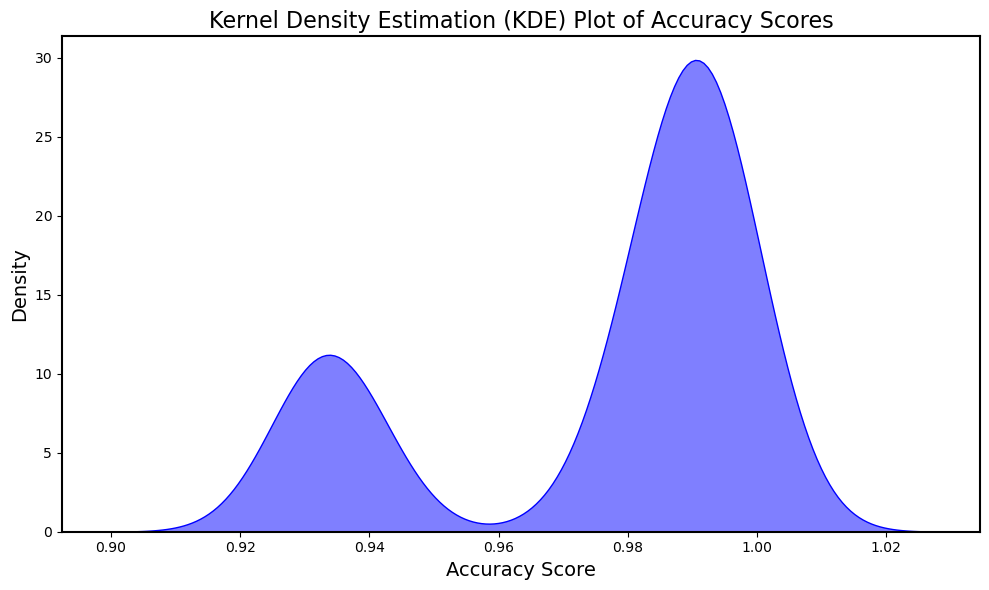

In [137]:
# Example accuracy scores
accuracy_scores = [Acc1, Acc2, Acc3, Acc4]

# Generate artificial continuous data around the accuracy scores
data = np.random.normal(loc=accuracy_scores, scale=0.005, size=(100, len(accuracy_scores))).flatten()

# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data, fill=True, color='blue', alpha=0.5)

# Adding labels and title
plt.title('Kernel Density Estimation (KDE) Plot of Accuracy Scores', fontsize=16)
plt.xlabel('Accuracy Score', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a box around the plot
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Box color
    spine.set_linewidth(1.5)  # Box width

plt.tight_layout()
plt.show()

# Lime (Local Interpretable Model-agnostic Explanations)

---

**LIME** is a powerful technique for improving the interpretability of machine learning models by providing ***localized explanations*** for predictions. It helps in understanding ***why a model made a specific decision*** for a given input.

**Key Features of LIME:**
- **Model-Agnostic:** LIME works independently of the underlying model type (e.g., random forest, XGBoost, deep learning), making it versatile.
- **Local Explanations:** It explains individual predictions by approximating the model behavior in a small neighborhood around the input instance.
- **Feature Importance:** Highlights which features contributed the most to the decision for a particular prediction.

In [139]:
import lime
import lime.lime_tabular

In [140]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,  # Ensure X_train is a NumPy array
    feature_names=X.columns,       # Provide feature names (if using pandas DataFrame)
    class_names=['COMPLETED', 'SUSPENDED', 'TERMINATED', 'WITHDRAWN'],  # Provide class names (modify for multi-class)
    mode='classification'          # Use 'classification' or 'regression'
)

In [141]:
# Select a sample from X_test
sample_index = 0
sample = X_test[sample_index]

# Explain the prediction
exp = explainer.explain_instance(
    data_row=sample,               # Single instance to explain
    predict_fn=model.predict_proba,  # Prediction function (output probabilities)
    num_features=10                # Number of features to display
)

# Display explanation
exp.show_in_notebook(show_table=True)

# Exporting a Model with pickle

In [199]:
import pickle

In [201]:
with open('catboost.pkl', 'wb') as file:
    pickle.dump(model, file)

In [203]:
with open('lightgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

In [205]:
with open('xgboost.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [207]:
with open('forest.pkl', 'wb') as file:
    pickle.dump(initial_rf, file)